In [1]:
import pandas
import numpy as np
import glob
import os, sys
import matplotlib.pyplot as plt


In [44]:
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [3]:
path ="/dors/capra_lab/users/fongsl/broadly_active_enhancers/data/roadmap_multi_data/hg38/human_specific"
os.chdir(path)

In [4]:
file_list = glob.glob("*chr*")

In [87]:
merged = pandas.DataFrame(np.arange(101), columns = ["num_species"])
df_dump = pandas.DataFrame(columns = ["chr", "overlap-enh", "species_count"])

In [88]:
for file in file_list:
    
    # read each chromosome file
    df = pandas.read_table(file, sep = '\t', header =-1)
    
    # rename the columns
    df.columns = ["chr", "start", "end", "overlap-enh", "overlap-percentile", "hg38chr", "hg38start", "hg38end", "strand", "ref", "species_count", "nonsense", "names", "length"]

    # ignore the roadmap peaks that don't map to hg38
    df = df.loc[df["length"]>0]
    
    #turn dtype into numeric
    df["species_count"] = df["species_count"].apply(pandas.to_numeric)
    
    #make a mini dataframe to dump into massive df_dump file
    short_df = df[["chr", "overlap-enh", "species_count"]]
    
    # append the short_df file to the massive dump file. 
    df_dump = df_dump.append(pandas.DataFrame(data = short_df), ignore_index=True)

/opt/easybuild/software/Core/Anaconda3/4.4.0/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [91]:
# create a column to annotate human specific "hs" and not human-specific enhancer fragments
df_dump['hs'] = np.where(df_dump['species_count']==0, "human-specific", "not human-specific")

#F***. How big is this dataset?
len(df_dump["chr"])
hs = len(df_dump.loc[df_dump["hs"] == "human-specific"])
con = len(df_dump.loc[df_dump["hs"] == "not human-specific"])

print(hs, " - peaks are human-specific")
print(con, " - peaks are conserved")

4958  - peaks are human-specific
35490853  - peaks are conserved


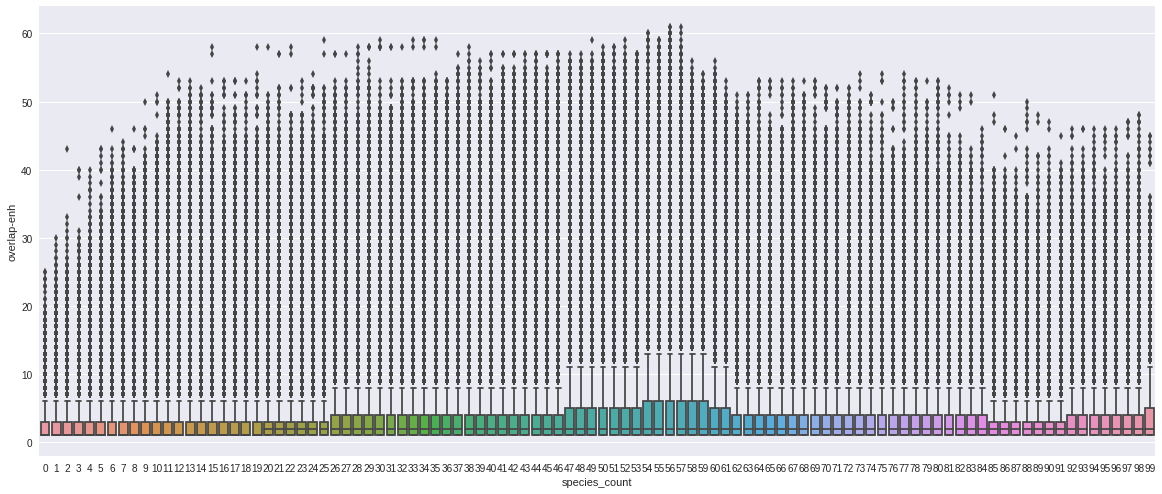

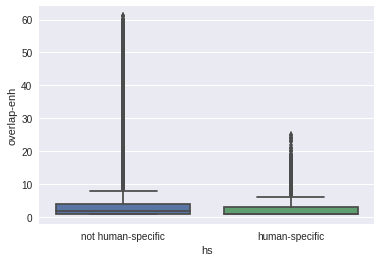

In [92]:
#plot the data by chromosome, and by human-specific status. 
a4_dims = (20, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

#plot each species
ax=sns.boxplot(x= "species_count", y = "overlap-enh", data = df_dump)
#ax.title = "%s hg38 100way species counts v. enhancer-overlap" % chrnum
plt.show()

# plot summary of hspecific v. not hspecific
ax=sns.boxplot(x= "hs", y = "overlap-enh", data = df_dump)
#ax.title = "%s hg38 100way human-specific v. enhancer-overlap" % chrnum
plt.show()

In [ ]:
sns.jointplot(x="species_count", y="overlap-enh", data=df_dump, kind="kde")

In [ ]:
df_dump.to_csv("%s/20180703_df_dump_species_count_enhancer_overlap.tsv"%path, sep = '\t', index = False, header = True)

In [ ]:
bae = df_dump.loc[df["overlap-enh"]>=10]

/opt/easybuild/software/Core/Anaconda3/4.4.0/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


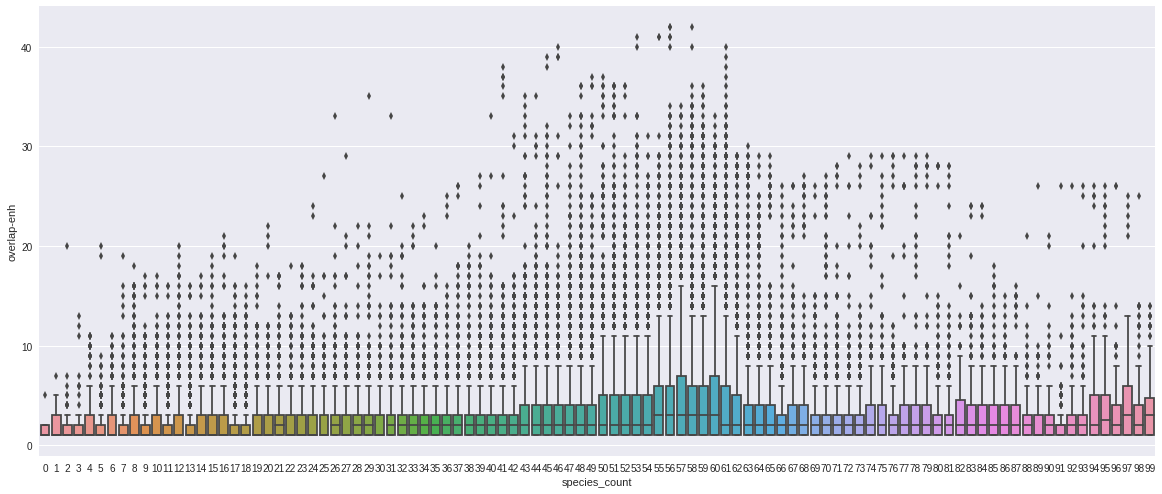

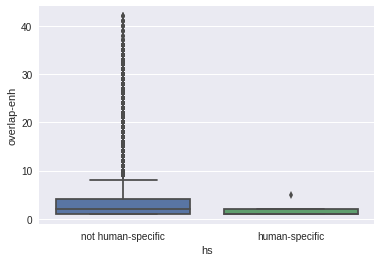

In [71]:
#test cell for plotting, measuring human specificity. 

%matplotlib inline
file = file_list[0]
df = pandas.read_table(file, sep = '\t', header =-1, nrows = 100000)
    
# rename the columns
df.columns = ["chr", "start", "end", "overlap-enh", "overlap-percentile", "hg38chr", "hg38start", "hg38end", "strand", "ref", "species_count", "nonsense", "names", "length"]

# ignore the roadmap peaks that don't map to hg38
df = df.loc[df["length"]>0]

chrnum = file.split("_")[0]

#change dtype to numeric
df["species_count"] = df["species_count"].apply(pandas.to_numeric)

#sort_values
#df = df.sort_values(by='species_count')

df['hs'] = np.where(df['species_count']==0, "human-specific", "not human-specific")


a4_dims = (20, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

#plot each species
ax=sns.boxplot(x= "species_count", y = "overlap-enh", data = df)
#ax.title = "%s hg38 100way species counts v. enhancer-overlap" % chrnum
plt.show()

# plot summary of hspecific v. not hspecific
ax=sns.boxplot(x= "hs", y = "overlap-enh", data = df)
#ax.title = "%s hg38 100way human-specific v. enhancer-overlap" % chrnum
plt.show()

In [ ]:
df.columns = ["chr", "start", "end", "overlap-enh", "overlap-percentile", "hg38chr", "hg38start", "hg38end", "strand", "ref", "species_count", "nonsense", "names", "length"]

/opt/easybuild/software/Core/Anaconda3/4.4.0/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


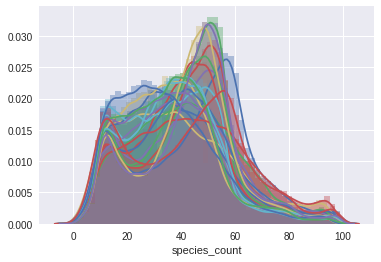

In [29]:
%matplotlib inline


# this portion of the script is to make counts of the villar species count as a way to define human-specific activity from the villar defined set of species instead of the 100way MultiZ 
for file in file_list:
    
    # read each chromosome file
    df = pandas.read_table(file, sep = '\t', header =-1, nrows = 100000)
    
    # rename the columns
    df.columns = ["chr", "start", "end", "overlap-enh", "overlap-percentile", "hg38chr", "hg38start", "hg38end", "strand", "ref", "species_count", "nonsense", "names", "length"]

    # ignore the roadmap peaks that don't map to hg38
    df = df.loc[df["length"]>0]
    chrnum = file.split("_")[0]
    #take the number of species each enhancer peak overlaps, turn into dtype(int), 
    #count the number of times that species overlap appears. Turn into dataframe.

    a = df["species_count"].astype(int).value_counts().to_frame()

    #the index for dataframe a is the number of species an enhancer peak overlaps. 
    #I have to reset the index in order to collect the number of species an enhancer overlaps.

    a=a.reset_index()
    a.columns = ["num_species", ("freq-%s"%chrnum)]

    merged = pandas.merge(merged, a, how="left", on = "num_species")
    merged = merged.copy()
#    print((a.sort_values("num_species").head()))
#    print(merged.head())

#the species count dtype needs to be converted to int for plotting. 
    ax = sns.distplot(df["species_count"].astype(int))#.set_title("num_species")



In [30]:
count_df = merged.copy()
count_df["sum"] =(count_df.iloc[:,1:23]).sum(axis=1)

hspecific = count_df["sum"].loc[count_df["num_species"]==0]
conserved = count_df["sum"].loc[count_df["num_species"]>0]

num_human = sum(hspecific)
num_con = sum(conserved)

print(num_human, num_con)
print(merged.head())
count_df.head()

351.0 2199631.0
   num_species  freq-chr14  freq-chr21  freq-chr12  freq-chr20  freq-chr19  \
0            0         9.0        25.0         8.0        14.0        22.0   
1            1        48.0        42.0        15.0        24.0        87.0   
2            2        81.0       115.0        50.0        80.0       171.0   
3            3       122.0       150.0       139.0       123.0       259.0   
4            4       213.0       198.0       198.0       201.0       401.0   

   freq-chr13  freq-chr4  freq-chr1  freq-chr6    ...      freq-chr22  \
0         3.0       43.0       16.0       33.0    ...            30.0   
1        13.0       86.0       42.0       44.0    ...            38.0   
2       151.0       86.0      166.0      151.0    ...            83.0   
3       331.0      209.0      153.0      155.0    ...           152.0   
4       353.0      267.0      245.0      210.0    ...           261.0   

   freq-chr18  freq-chr16  freq-chr10  freq-chr3  freq-chr15  freq-chr7  \
0

,num_species,freq-chr14,freq-chr21,freq-chr12,freq-chr20,freq-chr19,freq-chr13,freq-chr4,freq-chr1,freq-chr6,...,freq-chr18,freq-chr16,freq-chr10,freq-chr3,freq-chr15,freq-chr7,freq-chr2,freq-chr17,freq-chr9,sum
0,0,9.0,25.0,8.0,14.0,22.0,3.0,43.0,16.0,33.0,...,19.0,9.0,13.0,6.0,NaN,20.0,3.0,19.0,7.0,351.0
1,1,48.0,42.0,15.0,24.0,87.0,13.0,86.0,42.0,44.0,...,17.0,23.0,21.0,25.0,50.0,64.0,20.0,57.0,14.0,860.0
2,2,81.0,115.0,50.0,80.0,171.0,151.0,86.0,166.0,151.0,...,42.0,63.0,45.0,61.0,67.0,82.0,49.0,97.0,36.0,2001.0
3,3,122.0,150.0,139.0,123.0,259.0,331.0,209.0,153.0,155.0,...,66.0,120.0,121.0,119.0,159.0,161.0,93.0,184.0,122.0,3470.0
4,4,213.0,198.0,198.0,201.0,401.0,353.0,267.0,245.0,210.0,...,140.0,176.0,262.0,176.0,292.0,238.0,168.0,342.0,158.0,5315.0


In [31]:
merged.head()
pivot = pandas.pivot_table(merged, columns = ["num_species"])
pivot.head()

num_species,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
freq-chr1,16.0,42.0,166.0,153.0,245.0,342.0,378.0,530.0,675.0,935.0,...,202.0,239.0,263.0,257.0,255.0,169.0,60.0,18.0,3.0,1.0
freq-chr10,13.0,21.0,45.0,121.0,262.0,274.0,442.0,650.0,917.0,1227.0,...,70.0,91.0,114.0,82.0,75.0,106.0,127.0,81.0,45.0,66.0
freq-chr11,37.0,70.0,156.0,261.0,340.0,417.0,499.0,695.0,883.0,1106.0,...,196.0,218.0,184.0,163.0,154.0,91.0,87.0,37.0,15.0,4.0
freq-chr12,8.0,15.0,50.0,139.0,198.0,213.0,317.0,421.0,628.0,842.0,...,118.0,126.0,120.0,116.0,119.0,159.0,142.0,197.0,190.0,78.0
freq-chr13,3.0,13.0,151.0,331.0,353.0,383.0,520.0,622.0,920.0,1248.0,...,73.0,64.0,78.0,76.0,73.0,88.0,130.0,102.0,65.0,11.0


/opt/easybuild/software/Core/Anaconda3/4.4.0/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


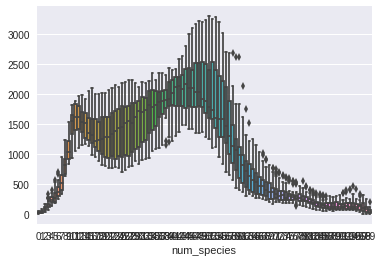

In [32]:
%matplotlib inline

ax = sns.boxplot(pivot)
#ax.set_ylabel = "sample overlap"

In [ ]:
#hq_species =['Mmul', 'Cjac', 'Mmus', 'Rnor', 'Ocun', 'Btau', 'Sscr', 'Cfam', 'Fcat'] #rhesus, marmoset, mouse, rat, rabbit, cow
hq_species = ['rheMac3', 'calJac3', 'mm10', 'rn6', 'oryCun2', 'bosTau8', 'canFam3', 'felCat8', 'susScr3']

In [ ]:
# this portion of the script is to make counts of the villar species count as a way to define human-specific activity from the villar defined set of species instead of the 100way MultiZ 
for file in file_list:
    df = pandas.read_table(file, sep = '\t', header =-1, nrows = 500)

    #THIS IS HOW YOU COUNT ITEMS IN A STRING
    df[12].str.strip('[]')

    for i in hq_species:
    
        df[i] = df[12].str.count(i)

    #sum the number of villar species for each enhancer 
    df["villar"] =(df[hq_species]).sum(axis=1)
    #collect species-count distributions for each chromosomes and save this into new dataframe
    a = df[10].value_counts()
    #df.to_csv('villar_ape_%s' % file, sep='\t', index = False, header = False)